In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np


In [2]:
iris=load_iris()

In [3]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target)

In [4]:
arbol=DecisionTreeClassifier()

In [5]:
arbol.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
arbol.score(x_test,y_test)

0.9736842105263158

In [7]:
arbol.score(x_train,y_train)

1.0

In [8]:
export_graphviz(arbol, out_file='arbol.dot', class_names=iris.target_names,
                feature_names=iris.feature_names, impurity=False, filled=True)

In [9]:
with open('arbol.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

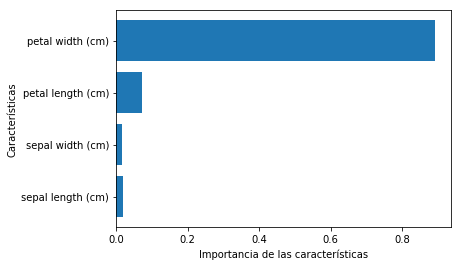

In [10]:
caract=iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.xlabel('Importancia de las características')
plt.ylabel('Características')
plt.show()

In [11]:
#niveles de desicon del arbol
arbol=DecisionTreeClassifier(max_depth=3)
arbol.fit(x_train, y_train)
arbol.score(x_test, y_test) #0.921052


0.9736842105263158

In [12]:
arbol.score(x_train, y_train) #0732142.9

0.9732142857142857

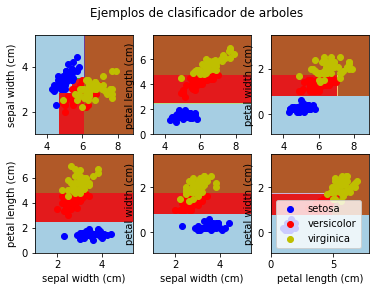

In [13]:
n_classes=3
plot_colors='bry'
plot_step=0.02

for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    
    #entrena algoritmo
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)
    plt.subplot(2,3,pairidx + 1)
    
    x_min, x_max=X[:,0].min() - 1, X[:,0].max() +1
    y_min, y_max=X[:,1].min() - 1, X[:,1].max() +1
    xx, yy=np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    cs=plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis('tight')

    #plot puntos de entrenamiento
    for i, color in zip(range(n_classes), plot_colors):
        idx=np.where(y == i)
        plt.scatter(X[idx, 0], X[idx,1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.axis('tight')

plt.suptitle('Ejemplos de clasificador de arboles')

plt.legend()
plt.show()